In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_excel("Distillation Column Dataset.xlsx")
data.head(10)

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463,0,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811,0,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544,0,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065,0,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774,0,0.965784,0.034216
5,150,49.866302,101.041502,49.871402,3724.463502,6716.273502,2733.993502,1053.263502,0.054402,0.501001,0.498999,76.691202,104.313502,110.381502,67.202602,0.817048,0,0.965834,0.034166
6,180,49.993916,101.203416,50.028916,3723.559416,6720.699416,2730.279416,1054.249416,0.054752,0.501001,0.498999,76.828516,104.449416,110.517416,67.338516,0.821701,0,0.965895,0.034105
7,210,50.303765,101.567965,50.362865,3721.670965,6722.360965,2730.720965,1055.240965,0.055087,0.501001,0.498999,77.149165,104.760965,110.828965,67.650065,0.824287,0,0.965953,0.034047
8,240,49.512472,100.835572,49.585372,3718.154572,6720.184572,2734.354572,1054.544572,0.055342,0.501001,0.498999,76.367072,103.964572,110.032572,66.853672,0.824215,0,0.965997,0.034003
9,270,49.542362,100.913462,49.616662,3715.693462,6716.733462,2741.883462,1054.363462,0.055466,0.501001,0.498999,76.400862,103.983462,110.051462,66.872562,0.821375,0,0.966019,0.033981


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            961 non-null    int64  
 1   Sensor1         961 non-null    float64
 2   Sensor2         961 non-null    float64
 3   Sensor3         961 non-null    float64
 4   Sensor4         961 non-null    float64
 5   Sensor5         961 non-null    float64
 6   Sensor6         961 non-null    float64
 7   Sensor7         961 non-null    float64
 8   Sensor8         961 non-null    float64
 9   Sensor9         961 non-null    float64
 10  Sensor10        961 non-null    float64
 11  Sensor11        961 non-null    float64
 12  Sensor12        961 non-null    float64
 13  Sensor13        961 non-null    float64
 14  Sensor14        961 non-null    float64
 15  Sensor15        961 non-null    float64
 16  Sensor16        961 non-null    int64  
 17  MoleFractionTX  961 non-null    flo

In [4]:
data.describe()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,MoleFractionTX,MoleFractionHX
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,9.610000e+02,9.610000e+02,961.000000,961.000000,961.000000,961.000000,961.000000,961.0,961.000000,961.000000
mean,14400.000000,49.994889,101.279649,49.555769,3823.335379,6865.768293,2805.781415,1053.164047,0.055029,5.010010e-01,4.989990e-01,76.835812,104.424765,110.492765,67.313865,0.809068,0.0,0.964015,0.035985
std,8326.833132,0.292281,0.452364,6.118368,511.213382,755.410384,259.579392,4.997380,0.003787,1.133017e-14,1.116355e-14,0.334343,0.280159,0.280159,0.280159,0.161491,0.0,0.008473,0.008473
min,0.000000,48.907668,97.702103,36.812829,3004.403494,5653.363002,2134.576770,1013.589114,0.028320,5.010010e-01,4.989990e-01,75.991528,103.930595,109.998595,66.819695,0.571794,0.0,0.950885,0.022401
25%,7200.000000,49.754926,101.033896,44.564921,3408.090531,6252.664563,2601.983148,1049.884770,0.053854,5.010010e-01,4.989990e-01,76.601021,104.183922,110.251922,67.073022,0.639547,0.0,0.957287,0.028810
50%,14400.000000,50.001056,101.296977,50.455106,3722.752040,6718.275361,2756.461191,1053.220322,0.054807,5.010010e-01,4.989990e-01,76.832795,104.426582,110.494582,67.315682,0.807521,0.0,0.965902,0.034098
75%,21600.000000,50.225012,101.539019,54.766717,4450.433352,7406.035409,3111.691346,1055.451884,0.056485,5.010010e-01,4.989990e-01,77.085614,104.649155,110.717155,67.538255,0.914706,0.0,0.971190,0.042713
max,28800.000000,50.807513,103.848213,57.890626,4562.816420,7957.048708,3300.394030,1084.786368,0.084926,5.010010e-01,4.989990e-01,77.891430,104.929458,110.997458,67.818558,1.644580,0.0,0.977599,0.049115


In [5]:
# As we can see Sensor16 data is Completely Zero , we can delete the Sensor 16 data
df = data.drop("Sensor16",axis = 1)

In [6]:
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


In [7]:
df.columns

Index(['Time', 'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5',
       'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11',
       'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'MoleFractionTX',
       'MoleFractionHX'],
      dtype='object')

In [8]:
df.isnull().sum()

Time              0
Sensor1           0
Sensor2           0
Sensor3           0
Sensor4           0
Sensor5           0
Sensor6           0
Sensor7           0
Sensor8           0
Sensor9           0
Sensor10          0
Sensor11          0
Sensor12          0
Sensor13          0
Sensor14          0
Sensor15          0
MoleFractionTX    0
MoleFractionHX    0
dtype: int64

# <font color = 'red'>Exploratory Data Analysis</font>

In [9]:
## Adding the Total Concentration
df['Total'] = df['MoleFractionTX']+df['MoleFractionHX']
df['Total'].all()  == 1

True

In [10]:
df['MoleFractionTX'].min(),df['MoleFractionTX'].max()

(0.950885, 0.977599)

In [11]:
df['MoleFractionHX'].min(),df['MoleFractionHX'].max()

(0.0224011, 0.0491153)

In [12]:
df.corr()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX,Total
Time,1.000000,-0.019574,-0.029011,-0.368683,-0.513477,-0.512541,-0.492081,0.302717,-0.187222,NaN,NaN,-0.294419,-0.018131,-0.018131,-0.018131,0.500055,0.516353,-0.516352,-0.011906
Sensor1,-0.019574,1.000000,0.746864,0.050232,-0.007076,-0.010455,0.042869,-0.056226,0.114151,NaN,NaN,0.833498,0.958142,0.958142,0.958142,-0.065869,0.031536,-0.031535,0.014613
Sensor2,-0.029011,0.746864,1.000000,0.105490,0.076542,0.084225,0.186376,0.058721,0.535252,NaN,NaN,0.659595,0.603224,0.603224,0.603224,-0.170118,0.026545,-0.026544,0.038363
Sensor3,-0.368683,0.050232,0.105490,1.000000,0.822167,0.823246,0.799410,-0.460723,0.317811,NaN,NaN,0.465501,0.048020,0.048020,0.048020,-0.745673,-0.815105,0.815104,0.048216
Sensor4,-0.513477,-0.007076,0.076542,0.822167,1.000000,0.998642,0.959892,-0.552521,0.441386,NaN,NaN,0.479340,-0.017119,-0.017119,-0.017119,-0.916069,-0.959240,0.959240,0.070907
Sensor5,-0.512541,-0.010455,0.084225,0.823246,0.998642,1.000000,0.959797,-0.529631,0.448470,NaN,NaN,0.480445,-0.018120,-0.018120,-0.018120,-0.911593,-0.961166,0.961166,0.072270
Sensor6,-0.492081,0.042869,0.186376,0.799410,0.959892,0.959797,1.000000,-0.662790,0.409924,NaN,NaN,0.518584,-0.020238,-0.020238,-0.020238,-0.969132,-0.941967,0.941967,0.075986
Sensor7,0.302717,-0.056226,0.058721,-0.460723,-0.552521,-0.529631,-0.662790,1.000000,0.117106,NaN,NaN,-0.313934,0.049303,0.049303,0.049303,0.738440,0.590367,-0.590366,-0.014434
Sensor8,-0.187222,0.114151,0.535252,0.317811,0.441386,0.448470,0.409924,0.117106,1.000000,NaN,NaN,0.202800,-0.002392,-0.002392,-0.002392,-0.369369,-0.226468,0.226469,0.047087
Sensor9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

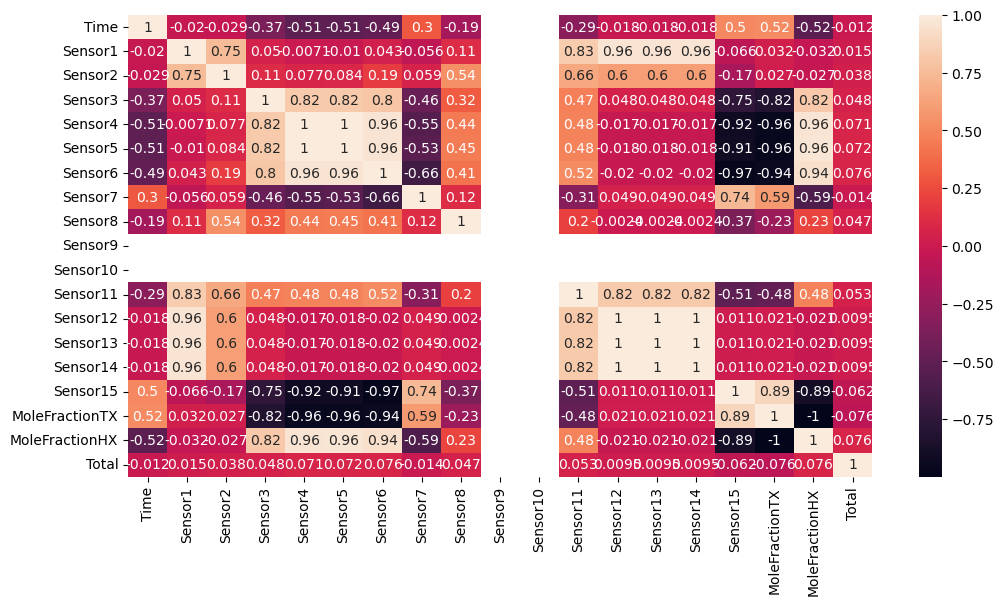

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True)

In [14]:
## Sensor 9 and Sensor 10 are not contributing any correlation ,So removing these columns
del df['Sensor9']
del df['Sensor10']

<AxesSubplot:>

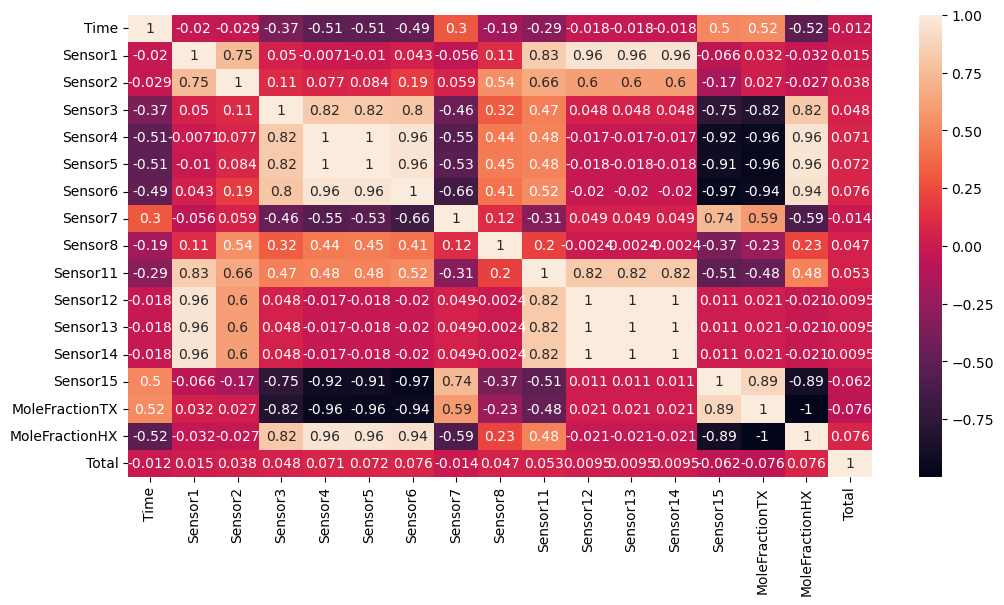

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True)

### By Taking the Columns which are strongly correlated to MoleFractoinTx or MoleFractionHx
### From The HeatMap 
### Time,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor11,Sensor15,MoleFractionTx

In [16]:
df1 = df[['Time','Sensor3','Sensor4','Sensor5','Sensor6','Sensor7', 'Sensor8', 'Sensor11','Sensor15', 'MoleFractionTX']]
df1.head()

,Time,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor11,Sensor15,MoleFractionTX
0,0,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,76.803959,0.798463,0.966281
1,30,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,76.437645,0.800811,0.965788
2,60,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,77.041465,0.803544,0.965758
3,90,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,77.016096,0.807065,0.965756
4,120,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,77.252293,0.811774,0.965784


<AxesSubplot:>

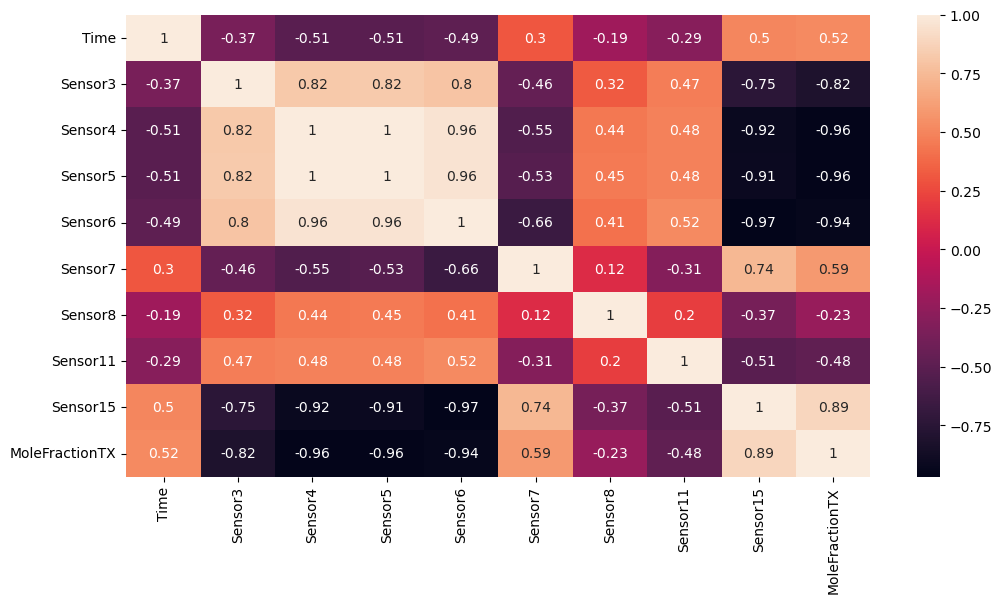

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),annot = True)

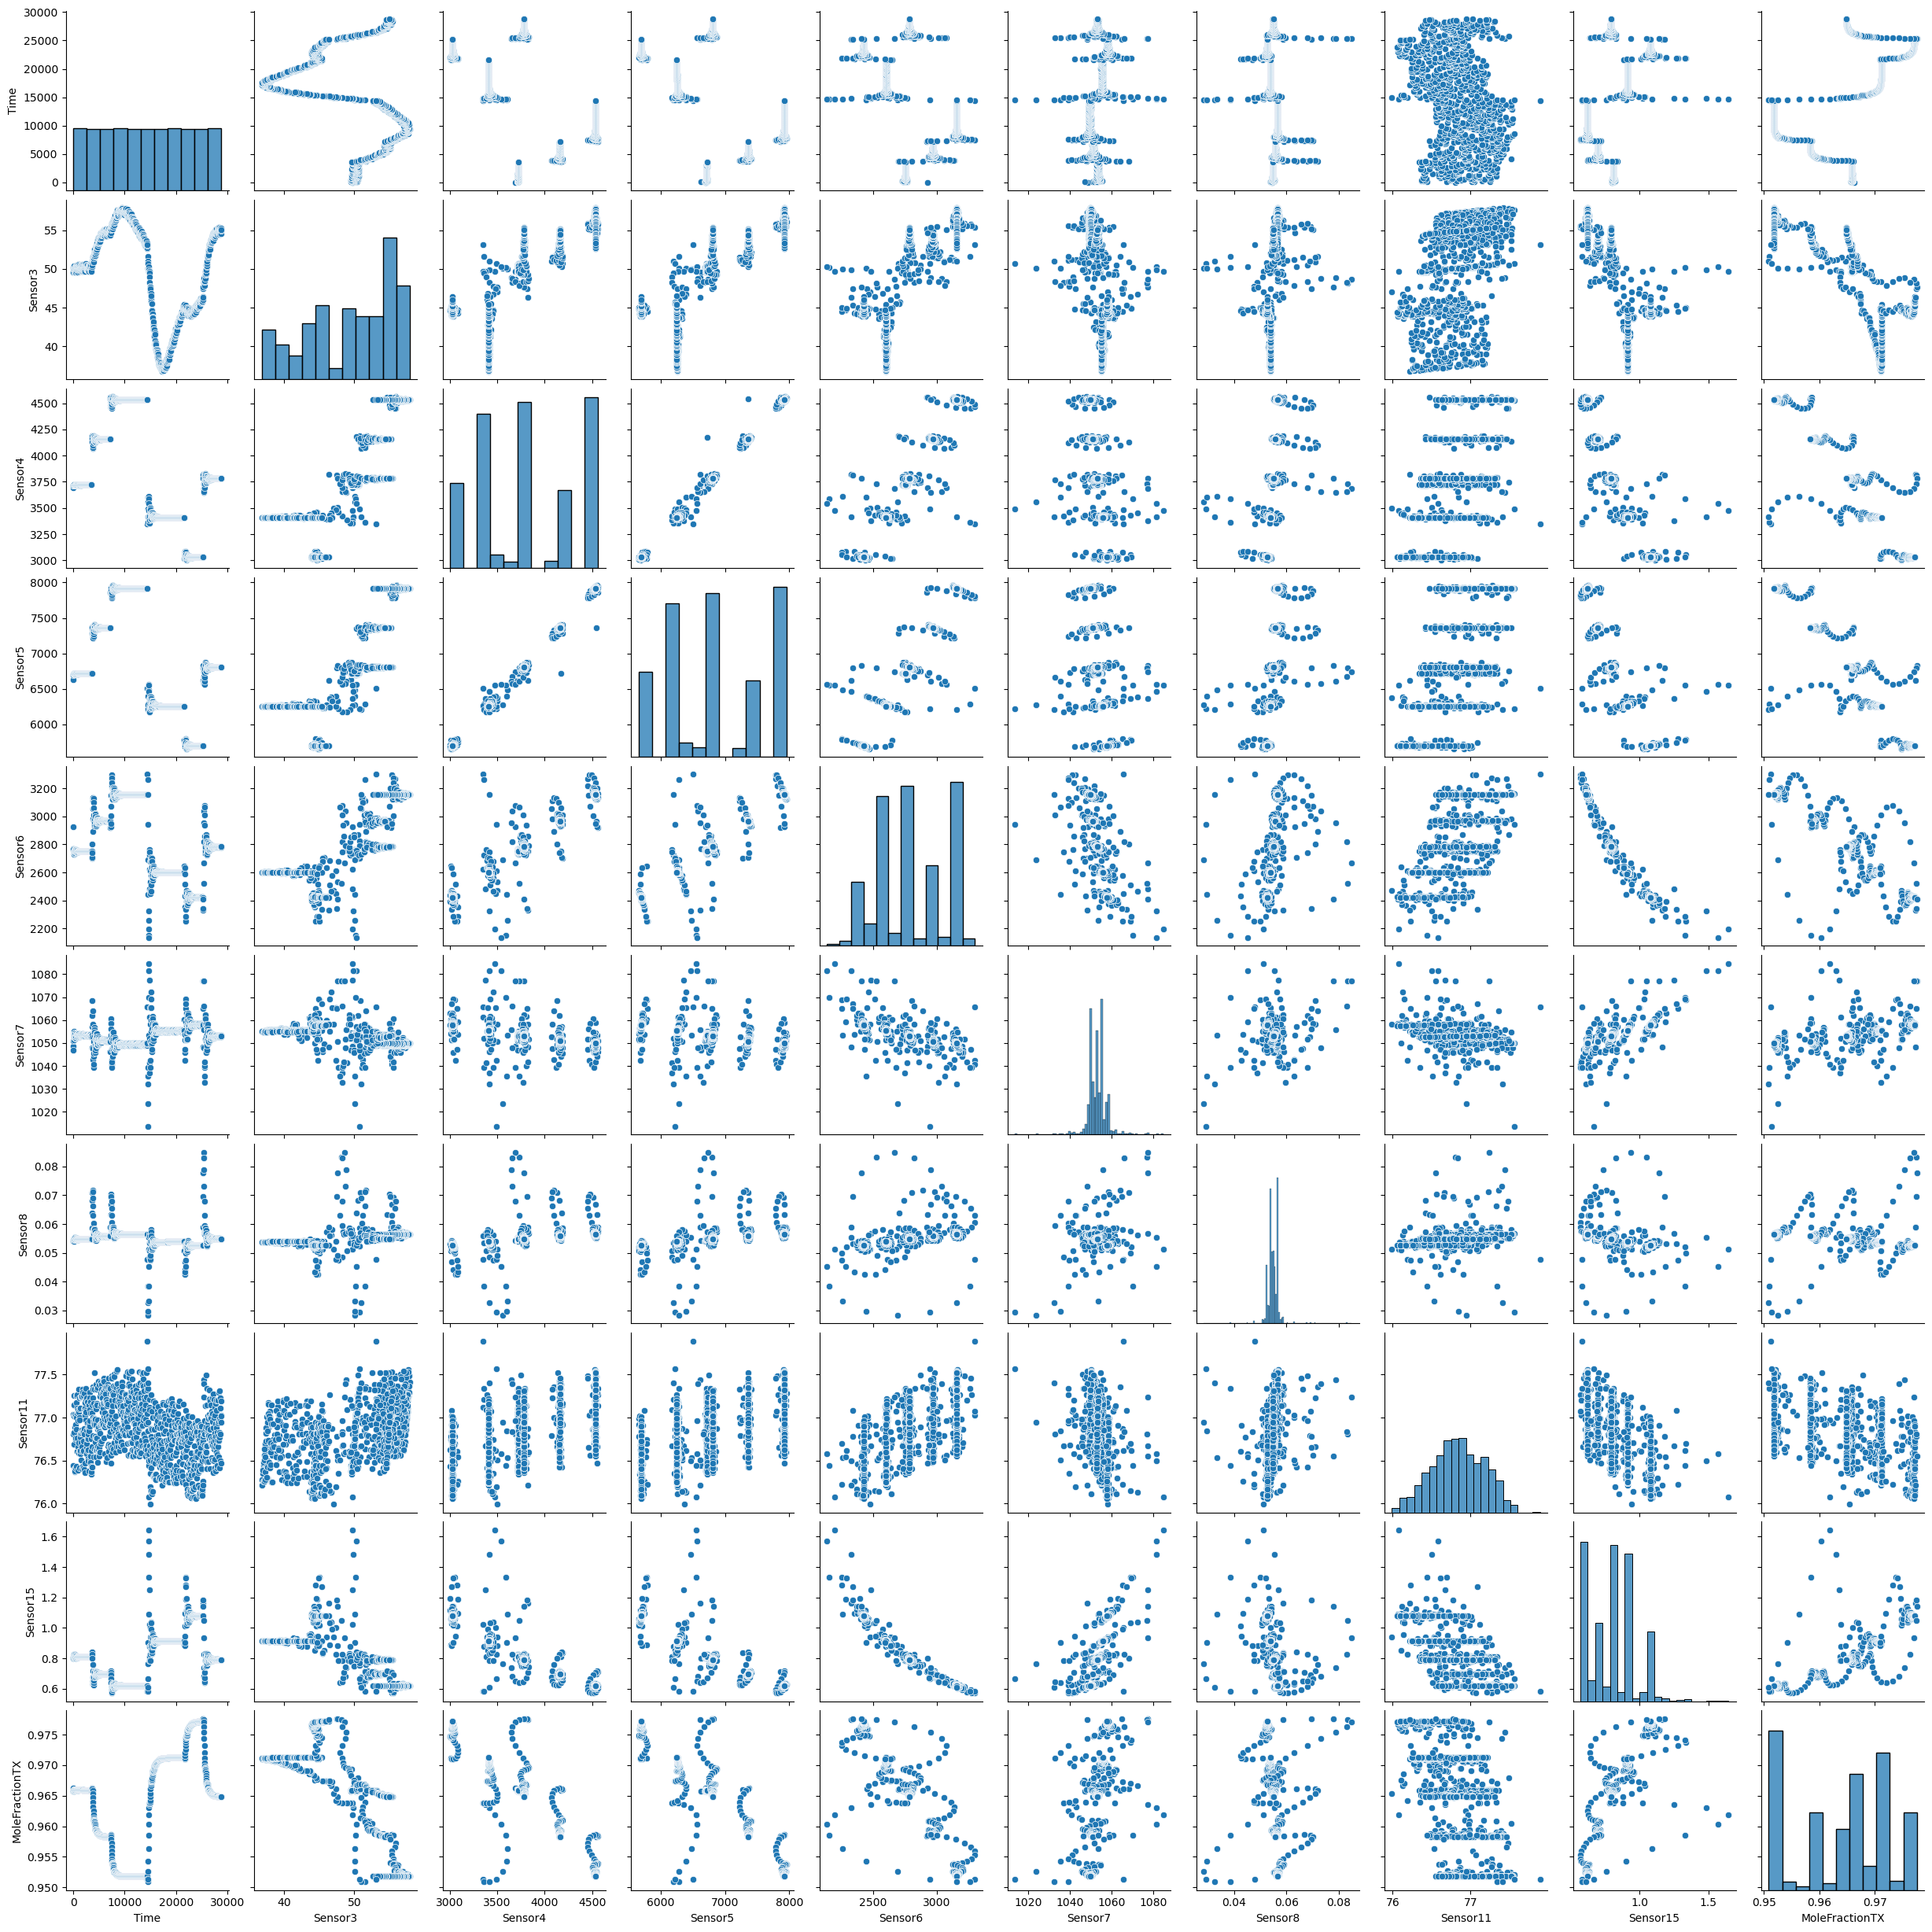

In [18]:
sns.pairplot(df1)

<AxesSubplot:xlabel='MoleFractionTX', ylabel='Density'>

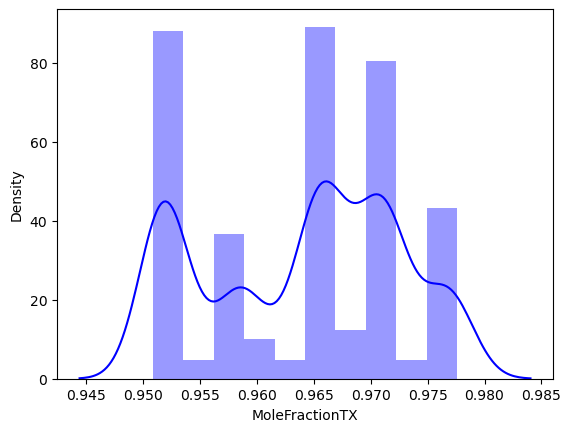

In [19]:
sns.distplot(df1['MoleFractionTX'],kde = True,color = 'blue')

# <font color = 'green'>Feature Engineering</font>

### Spliting The Data

In [20]:
X = df1.iloc[:,0:8]
Y = df1.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((768, 8), (193, 8), (768,), (193,))

# <font color = 'blue'>Model Training</font>
## <font color = 'green'>MultiLinear Regression</font>

In [23]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.coef_

array([ 2.01795251e-08, -3.75033211e-05,  3.70876794e-06, -1.10589627e-05,
       -1.19905475e-05, -1.73252988e-04,  6.46944485e-01,  6.13207110e-05])

In [25]:
lr.intercept_

1.203137198411841

In [26]:
y_pred = lr.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test,y_pred)
cost

1.2489443862089504e-06

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9825951564486666

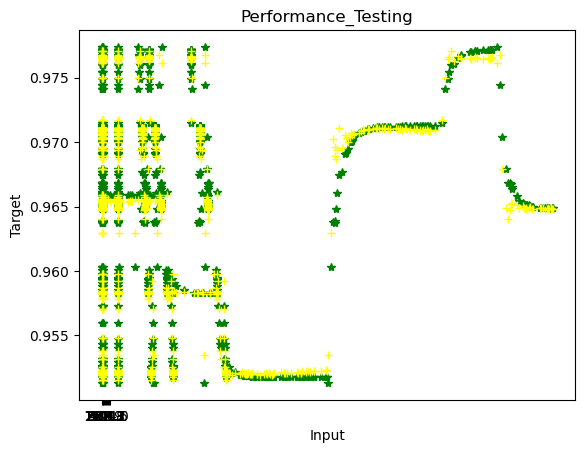

In [29]:
plt.plot(x_test,y_test,'*',color = 'green')
plt.plot(x_test,y_pred,'+',color = 'yellow')
plt.title("Performance_Testing")
plt.xlabel("Input")
plt.ylabel("Target")
plt.xticks(np.linspace(1,500,10))
plt.show()

# OLS Summary

In [30]:
import statsmodels.api as sm 
import statsmodels.tsa.api as smt

In [31]:
x_with_constant = sm.add_constant(x_train)

In [32]:
x_with_constant

,const,Time,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor11
751,1.0,22530,44.336920,3042.336820,5705.656820,2407.576820,1057.836820,0.052174,76.486120
363,1.0,10890,56.637233,4533.526733,7920.146733,3156.396733,1049.306733,0.056496,76.795633
62,1.0,1860,49.726033,3720.360733,6715.250733,2753.490733,1052.960733,0.054775,76.433633
79,1.0,2370,50.514647,3721.938247,6717.108247,2753.778247,1053.728247,0.054755,77.210847
653,1.0,19590,41.106284,3407.781484,6252.351484,2602.041484,1055.431484,0.053870,76.778784
...,...,...,...,...,...,...,...,...,...
835,1.0,25050,45.708140,3030.581740,5694.211740,2423.591740,1057.681740,0.052574,76.143040
192,1.0,5760,54.657239,4157.252739,7362.512739,2970.982739,1051.222739,0.055849,77.109839
629,1.0,18870,39.877925,3408.307325,6252.827325,2602.257325,1055.827325,0.053864,77.204625
559,1.0,16770,37.409969,3411.114969,6256.844969,2602.194969,1054.934969,0.053688,76.308369


In [33]:
model = sm.OLS(y_train,x_with_constant)

In [34]:
result = model.fit()

In [35]:
result.params

const       1.203137e+00
Time        2.017953e-08
Sensor3    -3.750332e-05
Sensor4     3.708768e-06
Sensor5    -1.105896e-05
Sensor6    -1.199055e-05
Sensor7    -1.732530e-04
Sensor8     6.469445e-01
Sensor11    6.132071e-05
dtype: float64

In [36]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         MoleFractionTX   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5851.
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        18:43:00   Log-Likelihood:                 4164.1
No. Observations:                 768   AIC:                            -8310.
Df Residuals:                     759   BIC:                            -8268.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2031      0.023     51.236      0.0

# <font color = 'green'>DecisionTreeRegression</font>

In [37]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
y_pred1 = dt.predict(x_test)

In [39]:
r2_score(y_test,y_pred1)

0.9858758345275511

# <font color = 'green'>RandomForestRegressor</font>

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

In [41]:
y_pred2 = rf.predict(x_test)
r2_score(y_test,y_pred2)

0.9923794387169639

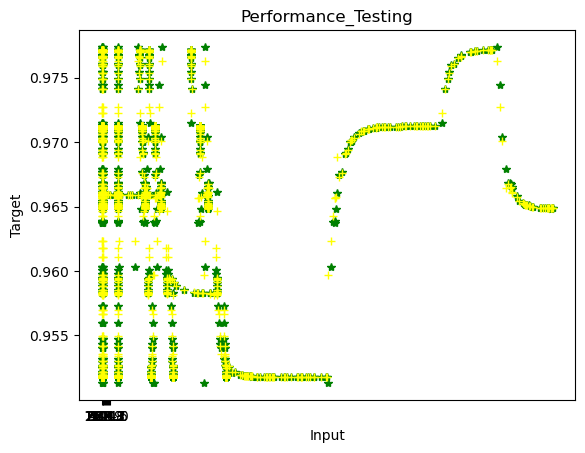

In [42]:
plt.plot(x_test,y_test,'*',color = 'green')
plt.plot(x_test,y_pred2,'+',color = 'yellow')
plt.title("Performance_Testing")
plt.xlabel("Input")
plt.ylabel("Target")
plt.xticks(np.linspace(1,500,10))
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error




# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# Print the best hyperparameters and corresponding mean squared error
print("Best parameters: ", grid_search.best_params_)
print("Best mean squared error: ", np.abs(grid_search.best_score_))
